<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Air_quality_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality Data**

This notebook documents my work on analyses of Air Quality data using Python. We will be using air-quality measurements, particularly, Nitrogen dioxide ($NO_{2}$) levels and Particulate Matter (PM10) data from Chatham roadside, Kent and St. Leonard's street, Edinburgh air monitoring stations. We will use python to retrieve, wrangle, clean, sort and filter the data, analyse and visualise the data to make conclusions on the air quality levels in these two places. The analyses in this notebook looks at Nitrogen dioxide levels and PM10 in these two places and can be repeated for any other pollutants and/or places.

The first part of the notebook documents my work on air quality data on Nitrogen dioxide measurements from Chatham Roadside, Kent and St. Leonard's street, Edinburgh. The second part of the notebook documents my work on PM10 from Chatham Roadside and Edinburgh St. Leonard's street.

##What is Air quality and what data is available on it?
**Source:** Department for Environment Food and Rural affairs (Defra), UK: https://uk-air.defra.gov.uk/air-pollution/

Air pollution can cause both short term and long term effects on health and many people are concerned about pollution in the air that they breathe. 

These people may include:

* People with heart or lung conditions, or other breathing problems, whose health may be affected by air pollution.
* Parents, carers and healthcare professionals who look after someone whose health is sensitive to pollution.
* People who want to know more about air pollution, its causes, and what they can do to help reduce it.
* The scientific community and students, who may need data on air pollution levels, either now or in the past, throughout the UK.

Free, detailed, clear and easy to use information on air pollution in the UK is available for all these purposes at UK's Defra, website on air pollution (link above).

## 1. Nitrogen Dioxide: 
**Source:** https://www.gov.uk/government/statistics/emissions-of-air-pollutants/emissions-of-air-pollutants-in-the-uk-nitrogen-oxides-nox 

In this section of this notebook, we will look at the measured value of Nitrogen dioxide levels in the air. Nitrogen dioxide, in the UK, mostly come from fuel combustion and is harmful to health. 

Short-term exposure to concentrations of NO2 can cause inflammation of the airways and increase susceptibility to respiratory infections and to allergens. NO2 can exacerbate the symptoms of those already suffering from lung or heart conditions. In addition, NOx can cause changes to the environment. Deposition of Nitrogen to the environment both directly as a gas (dry deposition) and in precipitation (wet deposition) can change soil chemistry and affect biodiversity in sensitive habitats.

Nitrogen oxides are also precursors for the formation of ozone. Ozone is a gas which is also damaging to human health and can trigger inflammation of the respiratory tract, eyes, nose and throat as well as asthma attacks. Moreover, ozone can have adverse effects on the environment through oxidative damage to vegetation including crops.

**Data:**

There are over 1500 sites across the UK that monitor air quality. They are organised into networks that gather a particular kind of information, using a particular method. There are two major types - automatic and non-automatic networks. The Monitoring Networks section provides further network information. All the measurements from these monitoring stations are available to download from the networks using the Data Selector Tool via Defra website.

https://uk-air.defra.gov.uk/data/

I have chosen to work with measured data from Chatham Roadside, Kent and Edinburgh's St. Leonard street stations in this notebook. The functions and code in this notebook can be used to repeat the same analyses for data from any other monitoring stations in the UK.

The following data files contains measured values of Nitrogen dioxide in the air collected at a roadside monitoring station at Chatham, Kent and St. Leonard's Street, Edinburgh. Access to data from these two air quality monitoring stations were obtained from DEFRA website (https://uk-air.defra.gov.uk/data/) and has been uploaded to my github. They can be found at: 

https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Kent.csv

https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Edin.csv

respectively.

The datasets obtained from DEFRA contain:
* a heading line (with station name) which will be skipped while loading the data and a separate column for each station will be created later when wrangling the dataframes to create a new dataset.
* dates are given rather as texts (so need to be converted to dates)
* times which are not all in the same format will also need to be converted to dates along with Date column.
* Nitrogen Dioxide levels which are, again, text sometimes contain "No data". This column needs to be converted to a numeric column with null values instead or "No data".
* Status which is always the same shows the unit of measurement for Nitrogen dioxide levels.

### Read, clean, sort and wrangle the data and write it to Pandas dataframe.

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with 'No data' in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone

def get_csv_data(url):
  data = pd.read_csv(url, skiprows=1)
  return data

def data_clean_wrangle(project_data,column,new_name):
  project_data['Date'] =  pd.to_datetime(project_data['Date'], format= "%d/%m/%Y")
  project_data[column] = project_data[column].replace('No data', np.nan)
  project_data[column] = pd.to_numeric(project_data[column], downcast="float")
  project_data['Weekdays'] = project_data['Date'].dt.weekday
  project_data['Day_of_the_week'] = project_data['Date'].dt.day_name()
  project_data = project_data.rename(columns={column: new_name})
  project_data = project_data.drop(columns=['Status'])
  return project_data

url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Edin.csv"
data = get_csv_data(url)
Edin_data = data_clean_wrangle(data, "Nitrogen dioxide","NO2 Level (V ug/m2)")

Did the data cleaning and sorting work?

In [ ]:
print(Edin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 35088 non-null  datetime64[ns]
 1   Time                 35088 non-null  object        
 2   NO2 Level (V ug/m2)  33014 non-null  float32       
 3   Weekdays             35088 non-null  int64         
 4   Day_of_the_week      35088 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
memory usage: 1.2+ MB
None


Let us take a look at the dataset for Edinburgh.

In [ ]:
print(Edin_data.head())

        Date      Time  NO2 Level (V ug/m2)  Weekdays Day_of_the_week
0 2017-03-01  01:00:00                  NaN         2       Wednesday
1 2017-03-01  02:00:00                  NaN         2       Wednesday
2 2017-03-01  03:00:00                  NaN         2       Wednesday
3 2017-03-01  04:00:00                  NaN         2       Wednesday
4 2017-03-01  05:00:00                  NaN         2       Wednesday


Now let's repeat the same for Chatham data.

Let's look at the data from Chatham.

In [ ]:
url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Kent.csv"
data = get_csv_data(url)
chatham_data = data_clean_wrangle(data, "Nitrogen dioxide","NO2 Level (V ug/m2)")

In [ ]:
print(chatham_data.shape)
print(chatham_data.head())
print(chatham_data.info())

(35088, 5)
        Date      Time  NO2 Level (V ug/m2)  Weekdays Day_of_the_week
0 2017-03-01  01:00:00              4.41596         2       Wednesday
1 2017-03-01  02:00:00              2.82604         2       Wednesday
2 2017-03-01  03:00:00              3.31484         2       Wednesday
3 2017-03-01  04:00:00              3.31149         2       Wednesday
4 2017-03-01  05:00:00              5.53478         2       Wednesday
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 35088 non-null  datetime64[ns]
 1   Time                 35088 non-null  object        
 2   NO2 Level (V ug/m2)  34588 non-null  float32       
 3   Weekdays             35088 non-null  int64         
 4   Day_of_the_week      35088 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
mem

Now let's put the two NO2 level datasets from Edinburgh and Chatham together into one dataframe. Since both of them have the same column names, let's rename them first.

In [ ]:
Edin_data.rename(columns = {'NO2 Level (V ug/m2)':'Edin_NO2_Level'}, inplace = True)
chatham_data.rename(columns = {'NO2 Level (V ug/m2)':'Chatham_NO2_Level'}, inplace = True)

Next let's create a new dataframe Nitrogen_data.

In [ ]:
Nitrogen_data = Edin_data.copy()
Nitrogen_data['Chatham_NO2_Level'] = chatham_data['Chatham_NO2_Level']
Nitrogen_data

,Date,Time,Edin_NO2_Level,Weekdays,Day_of_the_week,Chatham_NO2_Level
0,2017-03-01,01:00:00,NaN,2,Wednesday,4.415960
1,2017-03-01,02:00:00,NaN,2,Wednesday,2.826040
2,2017-03-01,03:00:00,NaN,2,Wednesday,3.314840
3,2017-03-01,04:00:00,NaN,2,Wednesday,3.311490
4,2017-03-01,05:00:00,NaN,2,Wednesday,5.534780
...,...,...,...,...,...,...
35083,2021-03-01,20:00:00,NaN,0,Monday,22.479891
35084,2021-03-01,21:00:00,NaN,0,Monday,18.130960
35085,2021-03-01,22:00:00,NaN,0,Monday,25.372990
35086,2021-03-01,23:00:00,NaN,0,Monday,24.558630


Let's rearrange the columns so the two nitrogen levels are next to each other.

In [ ]:
Nitrogen_data = Nitrogen_data[['Date', 'Time', "Edin_NO2_Level", 'Chatham_NO2_Level', 'Weekdays', 'Day_of_the_week']]

Let's now take a look at the new dataframe:

In [ ]:
Nitrogen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               35088 non-null  datetime64[ns]
 1   Time               35088 non-null  object        
 2   Edin_NO2_Level     33014 non-null  float32       
 3   Chatham_NO2_Level  34588 non-null  float32       
 4   Weekdays           35088 non-null  int64         
 5   Day_of_the_week    35088 non-null  object        
dtypes: datetime64[ns](1), float32(2), int64(1), object(2)
memory usage: 1.3+ MB


We have null values in both NO2 levels columns. This will make it difficult for further analyses. So, let's get rid of the null values in both NO2 columns.


In [ ]:
Nitrogen_data = Nitrogen_data.dropna(subset = ["Edin_NO2_Level", 'Chatham_NO2_Level'])

###Comparing the $NO_{2}$ levels measured in two stations:

Now that the null values are gone, let's get some basic statistics.

In [ ]:
Nitrogen_data.describe()

,Edin_NO2_Level,Chatham_NO2_Level,Weekdays
count,32565.000000,32565.000000,32565.000000
mean,17.858732,22.502911,3.024628
std,14.722378,14.758221,2.002718
min,0.103840,0.054630,0.000000
25%,7.388240,11.140810,1.000000
50%,13.457740,19.195709,3.000000
75%,23.722401,30.881430,5.000000
max,108.297943,113.061890,6.000000


Clearly, the mean values of Nitrogen dioxide levels in Chatham is higher than Edinburgh. Let's take a look at the overall distribution, quartile values, min and maximum of the $NO_{2}$ levels in both Chatham and Edinburgh using boxplot.

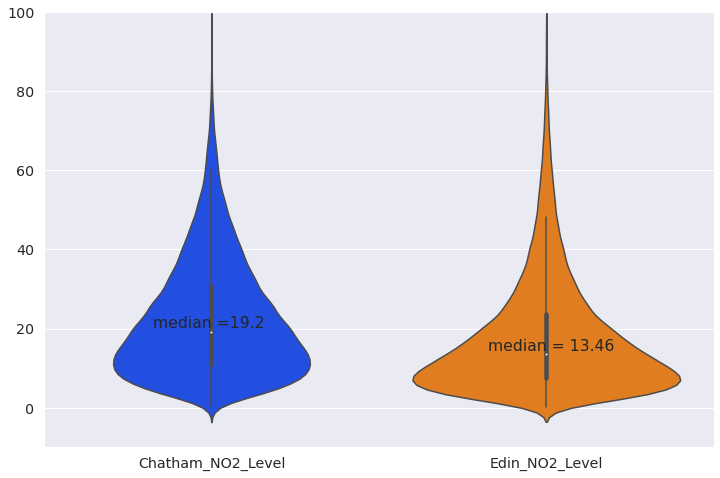

In [ ]:
from seaborn.categorical import violinplot
import seaborn as sns
def do_violin_plot(df, column1, column2, y_label):
  sns.set(rc={'figure.figsize':(12,8)})
  sns.set(font_scale=1.3) 
  sns.set_palette("bright")
  plt.ylim(-10, 100)
  median1 = round(df[column1].median(),2)
  median2 = round(df[column2].median(),2)
  medians = [median1, median2]
  xposlist = range(len(medians))
  stringlist = ['median ='+ str(median1),'median = '+ str(median2)]
  ax = sns.violinplot(data=df[[column1, column2]], inner="box")
  for i in range(len(stringlist)):
      ax.text(xposlist[i]-0.175, medians[i]+1, stringlist[i])
  return

do_violin_plot(Nitrogen_data, 'Chatham_NO2_Level', 'Edin_NO2_Level', "$NO_{2}$ Level (V ug/m2)")

The above chart and statistics shows us the average, standard deviation, quartles and the overall distribution of $NO_{2}$ in these two places. Clearly Edinburgh has more measurements that show lower levels of $NO_{2}$ emmisions compared to Chatham. But let's compare the hourly and daily measurements trends over all the years in the two stations. 

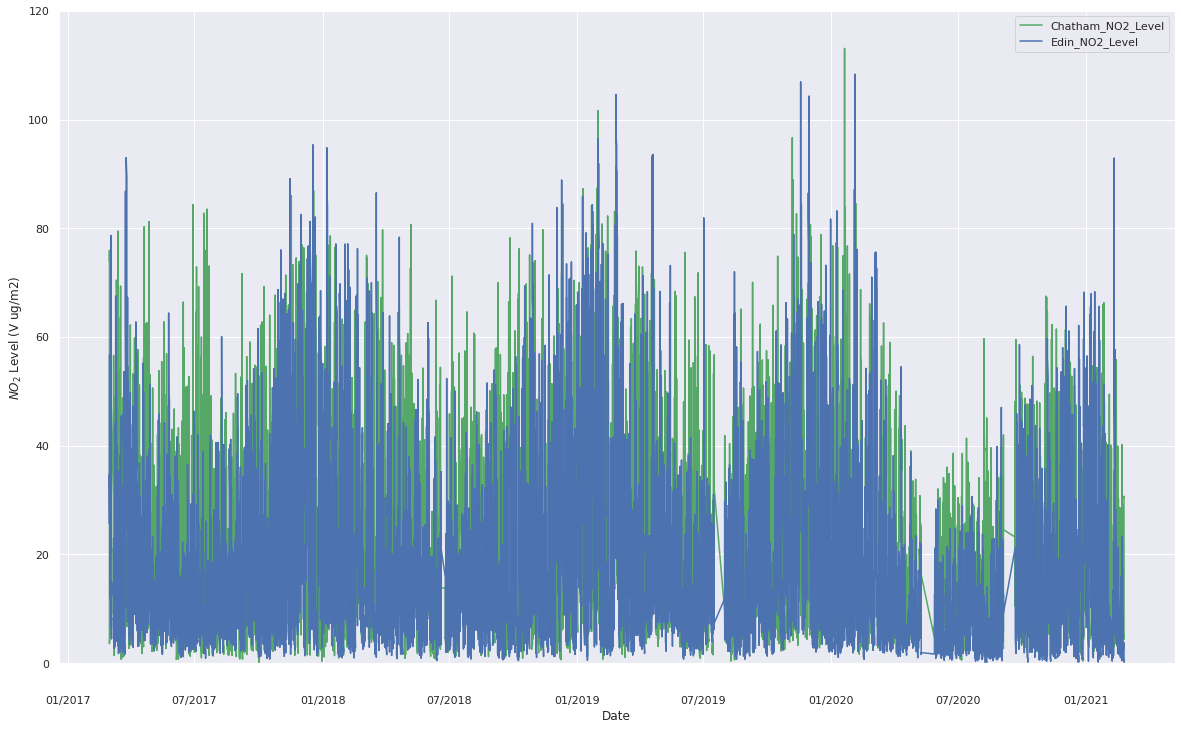

In [ ]:
import matplotlib.pyplot as plt


import matplotlib.dates as mdates

def do_line_plot_columns(df, column1, column2,column3,x_label,y_label):
  fig, ax1 = plt.subplots(figsize=(20, 12))
  ax1.set(xlabel=x_label, ylabel=y_label)
  ax1.set_ylim([0, 120])
  ax1.plot(df[column1], df[column2], color='g', label = column2)
  ax1.plot(df[column1], df[column3], color='b', label = column3)
  ax1.xaxis.set(major_formatter=mdates.DateFormatter("\n\n%m/%Y"))
  leg = ax1.legend();
  plt.show()
  return

do_line_plot_columns(Nitrogen_data,"Date", "Chatham_NO2_Level","Edin_NO2_Level",'Date','$NO_{2}$ Level (V ug/m2)')

From the above graph it looks like that both monitoring stations recorded lower levels of $NO_{2}$ emmisions in later part of 2020 (perhaps due to lockdown). So let's look at the total $NO_{2}$ emmissions by the year.

Let's create a new dataframe for th yearly data so that the sorted and grouped data can be stored separately.

In [ ]:
def make_yearly_data(df):
  yearly_data = df.copy()
  yearly_data['year'] = yearly_data['Date'].dt.year
  return yearly_data

yearly_data =make_yearly_data(Nitrogen_data)
yearly_data

,Date,Time,Edin_NO2_Level,Chatham_NO2_Level,Weekdays,Day_of_the_week,Bool_comparison,year
8,2017-03-01,09:00:00,56.689690,73.884659,2,Wednesday,True,2017
9,2017-03-01,10:00:00,51.444340,34.998268,2,Wednesday,False,2017
10,2017-03-01,11:00:00,36.054932,38.798409,2,Wednesday,True,2017
12,2017-03-01,13:00:00,25.692530,38.773071,2,Wednesday,True,2017
13,2017-03-01,14:00:00,27.418079,25.064751,2,Wednesday,False,2017
...,...,...,...,...,...,...,...,...
34948,2021-02-24,05:00:00,0.695030,6.934030,2,Wednesday,True,2021
34949,2021-02-24,06:00:00,0.848670,11.319860,2,Wednesday,True,2021
34950,2021-02-24,07:00:00,1.811830,15.248120,2,Wednesday,True,2021
34951,2021-02-24,08:00:00,3.683820,30.662081,2,Wednesday,True,2021


Group the data by year and Day of the week - this will allow us to look at yearly trends as well as to identify which days in the week has higher emmisions of $NO_{2}$.

In [ ]:
yearly_data = yearly_data.groupby(by = ['year', 'Day_of_the_week'])['Chatham_NO2_Level','Edin_NO2_Level'].mean().reset_index()
yearly_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,year,Day_of_the_week,Chatham_NO2_Level,Edin_NO2_Level
0,2017,Friday,25.710041,21.036032
1,2017,Monday,23.940300,18.426754
2,2017,Saturday,22.779654,18.603403
3,2017,Sunday,17.068417,16.605040
4,2017,Thursday,26.988962,20.456272
5,2017,Tuesday,26.677376,18.105906
6,2017,Wednesday,23.503975,18.739988
7,2018,Friday,26.116222,19.303839
8,2018,Monday,24.346972,19.534292
9,2018,Saturday,22.299091,16.860706


First let's find the yearly average.

In [ ]:
yearly_ave = yearly_data.groupby(by = ['year'])['Chatham_NO2_Level','Edin_NO2_Level'].mean().reset_index()
yearly_ave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,year,Chatham_NO2_Level,Edin_NO2_Level
0,2017,23.809818,18.853342
1,2018,23.453270,17.920425
2,2019,24.554691,20.840216
3,2020,18.689884,13.757909
4,2021,19.108713,17.238684


Visualise the yearly pattern between the two stations.

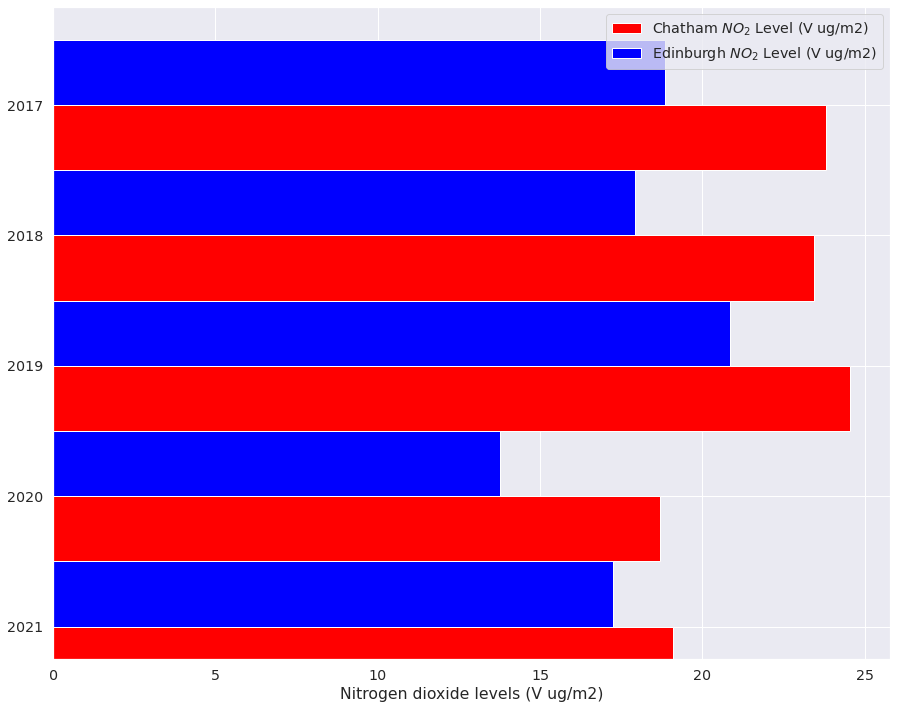

In [ ]:
x = yearly_ave['year']
y1 = yearly_ave.Chatham_NO2_Level
y2 = yearly_ave.Edin_NO2_Level

def do_bar_plot1(x,y1,y2, x_label,legend):
  x_pos = [i for i, _ in enumerate(x)]
  plt.figure(figsize = (15,12))
  bar_plot = y1.plot(x="year", y=y1, kind="barh", color ='red', position =0)
  bar_plot = y2.plot(x="year", y=y2, kind="barh", color ='blue', position =1)
  plt.legend(legend,loc=1)
  plt.yticks(x_pos, x)
  plt.gca().invert_yaxis()
  plt.xlabel(x_label)
  plt.show()
  return

do_bar_plot1(x,y1,y2,"Nitrogen dioxide levels (V ug/m2)",['Chatham $NO_{2}$ Level (V ug/m2)', 'Edinburgh $NO_{2}$ Level (V ug/m2)'])

Every year, the average emmison of $NO_{2}$ is higher in Chatham than in Edinburgh. Year 2020 shows a dramatic decrease in the the average emmison of $NO_{2}$ in both places. This is most likely due to the Covid-19 related lockdown.

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def get_correlation(nparray1,nparray2):
  # code to get the correlation figure for both salaries
  R_matrix = np.corrcoef(nparray1, nparray2)
  return R_matrix

R_value = get_correlation(x,y1)
print(color.BOLD+"The Pearson correlation coefficient between year and NO2 level in Chatham is:"+color.END+"{:10.2f}".format(R_value[0][1]))
print("This shows that there is a strong correlation between year and NO2 levels in Chatham")

The Pearson correlation coefficient between year and NO2 level in Chatham is:     -0.80
This shows that there is a strong correlation between year and NO2 levels in Chatham


This shows that the $NO_{2}$ levels in Chatham has been going down over the years.

In [ ]:
R_value = get_correlation(x,y2)
print(color.BOLD+"The Pearson correlation coefficient between year and NO2 level in Edinburgh is:"+color.END+"{:10.2f}".format(R_value[0][1]))
print("This shows that there is a medium level correlation between year and NO2 levels in Edinburgh")

The Pearson correlation coefficient between year and NO2 level in Edinburgh is:     -0.45
This shows that there is a strong correlation between year and NO2 levels in Edinburgh


This shows that the $NO_{2}$ levels in Edinburgh has been going down (at a slower rate than in Chatham Road side) over the years.

Which days in the week has higher average emmison of $NO_{2}$?

In [ ]:
weekly_ave = yearly_data.groupby(by = ['Day_of_the_week'])['Chatham_NO2_Level','Edin_NO2_Level'].mean().reset_index()
weekly_ave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Day_of_the_week,Chatham_NO2_Level,Edin_NO2_Level
0,Friday,24.394238,19.223583
1,Monday,22.335760,16.682114
2,Saturday,20.330767,16.151476
3,Sunday,16.485897,15.091596
4,Thursday,23.849905,19.081661
5,Tuesday,22.609055,18.629635
6,Wednesday,23.457310,19.194740


Let's look at the week days average trend for both places

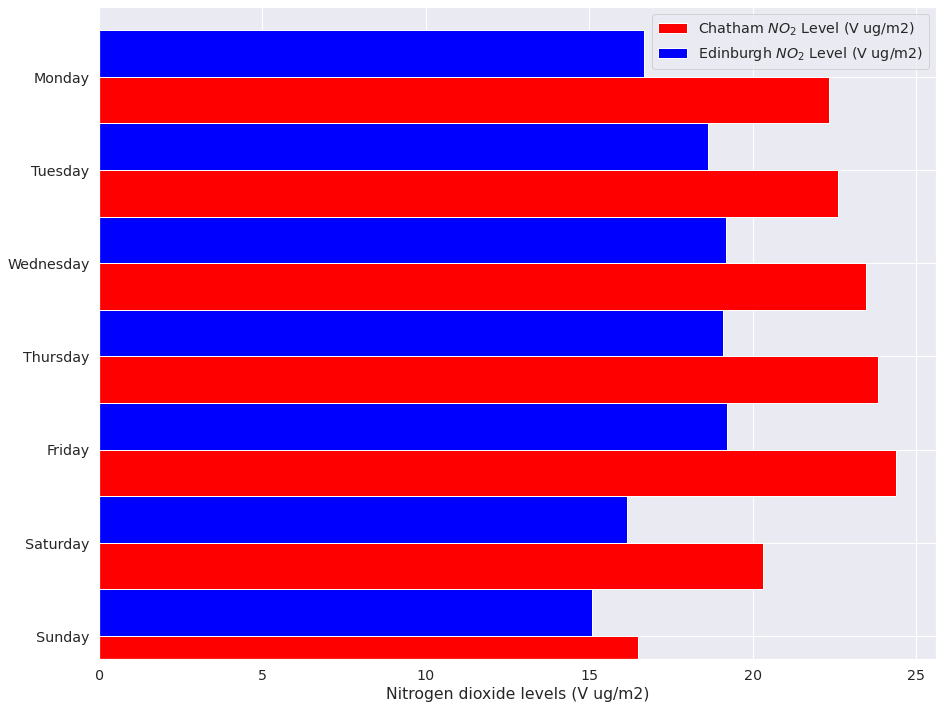

In [ ]:
from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_ave['Day_of_the_week'] = pd.Categorical(weekly_ave['Day_of_the_week'], categories=cats, ordered=True)
weekly_ave = weekly_ave.sort_values('Day_of_the_week')

x2 = weekly_ave['Day_of_the_week']
y3 = weekly_ave.Chatham_NO2_Level
y4 = weekly_ave.Edin_NO2_Level

do_bar_plot1(x2,y3,y4,"Nitrogen dioxide levels (V ug/m2)",['Chatham $NO_{2}$ Level (V ug/m2)', 'Edinburgh $NO_{2}$ Level (V ug/m2)'])

As expected, week days show higher levels of $NO_{2}$ in the air, most likely, due to people travelling to and back from work. Sunday seems to record the lowest level of $NO_{2}$ in the air

We see that from the descriptive statistics results, above, the over all mean is higher at Chatham compared to Edinburgh and so is the maximum value. But how does each measurement compare between the two? For this, we will use `.gt()` function. If $NO_{2}$ level is higher than Chatham, we will get a true if not it will be a false. 


In [ ]:
Nitrogen_data['Bool_comparison'] = Nitrogen_data['Chatham_NO2_Level'].gt(Nitrogen_data['Edin_NO2_Level'])

In [ ]:
Nitrogen_data['Bool_comparison']

8         True
9        False
10        True
12        True
13       False
         ...  
34948     True
34949     True
34950     True
34951     True
34952     True
Name: Bool_comparison, Length: 32565, dtype: bool

Let's use seaborn to do some visualisations of the comparisons. 

How many time during each day of the week has Chatham station shown higher levels of $NO_{2}$ compared to Edinburgh St. Leonard's street?

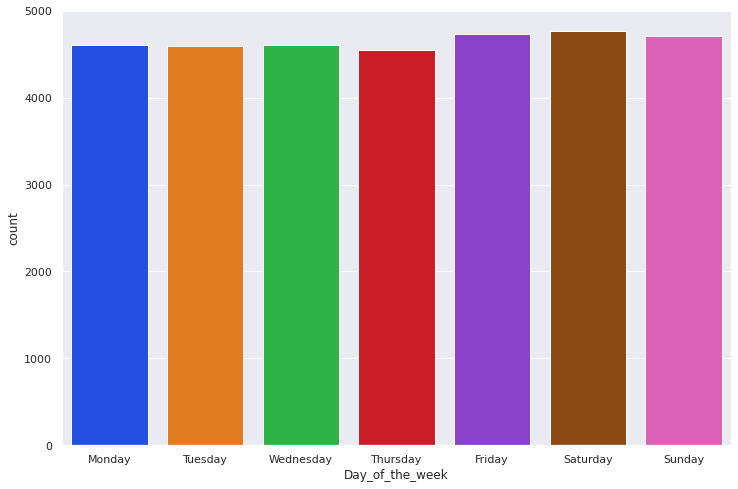

In [ ]:
def do_count_plot(x, y):
  sns.set(rc={'figure.figsize':(12,8)})
  sns.set_palette("bright")
  order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  sns.countplot(x=x, data = y, order = order)
  return

do_count_plot(Nitrogen_data.Day_of_the_week, Nitrogen_data.Bool_comparison)

The above graph shows that everyday of the week, shows that Chatham Roadside measures significant number of higher level of $NO_{2}$ measurements compared to Edinburgh. This difference is more pronounced during the weekends, perhaps, showing that vehicle use in Chatham roadside remains on the high side compared to Edinburgh even during the weekends.

## 2. Particle Matter 10: 
**Source:** https://www.gov.uk/government/statistics/emissions-of-air-pollutants/emissions-of-air-pollutants-in-the-uk-nitrogen-oxides-nox 

In this section of this notebook, we will look at the measured value of Particle Matter 10 (PM10) levels in the air. Unlike Nitrogen dioxide, which comes from fuel combustion, PM10 also includes dust from construction sites, landfills and agriculture, wildfires and brush/waste burning, industrial sources, wind-blown dust from open lands, pollen and fragments of bacteria. 

Particulate Matter 10 (PM10) is everything in the air that is not a gas and as such it is made up from a huge variety of chemical compounds and materials some which can be toxic. Due to the small size of many of the particles that form PM some of these toxins may enter the bloodstream and be transported around the body, lodging in the heart, brain and other organs. Therefore, exposure to PM can result in serious impacts to health, especially in vulnerable groups of people such as the young, elderly and those with respiratory problems. As a result, particulates are classified according to size. The UK is currently focused on measuring the fractions of PM where particles are less than 10 micrometres in diameter (PM10).

**Data:**

All the PM10 measurements from these monitoring stations are available to download data from the networks using the Data Selector Tool via Defra website.

https://uk-air.defra.gov.uk/data/

The following data files contains measured values of PM10 in the air collected at a roadside monitoring station at Chatham, Kent and St. Leonard's Street, Edinburgh. Access to data from these two air quality monitoring stations were obtained from DEFRA website (https://uk-air.defra.gov.uk/data/) and has been uploaded to my github. They can be found at: 

https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/PM10_Kent.csv

https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/PM10_Edin.csv

respectively.

The datasets obtained from DEFRA contain:
* a heading line (with station name) which will be skipped while loading the data and a separate column for each station will be created later when wrangling the dataframes to create a new dataset.
* dates are given rather as texts (so need to be converted to dates)
* times which are not all in the same format will also need to be converted to dates along with Date column.
* PM10 levels which are, again, text sometimes contain "No data". This column needs to be converted to a numeric column with null values instead or "No data".
* Status which is always the same shows the unit of measurement for PM10 levels.

We have all the necessary codes to retrieve, wrangle, sort, clean and visualise data as user defined functions in the first part of this notebook. So, we will simply use those user defined functions to do all our analyses for PM10 data. Let's read the Edinburgh data.

In [ ]:
url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/PM10_Edin.csv"
data = get_csv_data(url)
Edin_PM_data = data_clean_wrangle(data, "PM10 particulate matter (Hourly measured)","Edin_PM10 (V ugm-3)")

In [ ]:
Edin_PM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 43848 non-null  datetime64[ns]
 1   Time                 43848 non-null  object        
 2   Edin_PM10 (V ugm-3)  41755 non-null  float32       
 3   Weekdays             43848 non-null  int64         
 4   Day_of_the_week      43848 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
memory usage: 1.5+ MB


Next, let's read the Chatham PM10 data.

In [ ]:
url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/PM10_Kent.csv"
data = get_csv_data(url)
Chatham_PM_data = data_clean_wrangle(data, "PM10 Kent (Hourly measured)","Chatham_PM10 (V ugm-3)")

In [ ]:
Chatham_PM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    43848 non-null  datetime64[ns]
 1   Time                    43848 non-null  object        
 2   Chatham_PM10 (V ugm-3)  42258 non-null  float32       
 3   Weekdays                43848 non-null  int64         
 4   Day_of_the_week         43848 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
memory usage: 1.5+ MB


Let's combine the two make a new data frame for PM10.

In [ ]:
PM10_data = Edin_PM_data.copy()
PM10_data['Chatham_PM10 (V ugm-3)'] = Chatham_PM_data['Chatham_PM10 (V ugm-3)']
PM10_data

,Date,Time,Edin_PM10 (V ugm-3),Weekdays,Day_of_the_week,Chatham_PM10 (V ugm-3)
0,2017-03-01,01:00:00,NaN,2,Wednesday,8.387000
1,2017-03-01,02:00:00,NaN,2,Wednesday,7.440000
2,2017-03-01,03:00:00,NaN,2,Wednesday,8.387000
3,2017-03-01,04:00:00,NaN,2,Wednesday,10.744000
4,2017-03-01,05:00:00,NaN,2,Wednesday,16.406000
...,...,...,...,...,...,...
43843,2022-03-01,20:00:00,19.6,1,Tuesday,18.358000
43844,2022-03-01,21:00:00,16.0,1,Tuesday,15.459000
43845,2022-03-01,22:00:00,13.8,1,Tuesday,16.424999
43846,2022-03-01,23:00:00,11.2,1,Tuesday,41.547001


Let's clean and sort the data like we did in part 1 for Nitrogen Dioxide date.

In [ ]:
PM10_data = PM10_data[['Date', 'Time', "Edin_PM10 (V ugm-3)", 'Chatham_PM10 (V ugm-3)', 'Weekdays', 'Day_of_the_week']]

In [ ]:
PM10_data = PM10_data.dropna(subset = ["Edin_PM10 (V ugm-3)", 'Chatham_PM10 (V ugm-3)'])

###Comparing the PM10 levels in the two stations:
 

In [ ]:
PM10_data.describe()

,Edin_PM10 (V ugm-3),Chatham_PM10 (V ugm-3),Weekdays
count,40180.000000,40180.000000,40180.000000
mean,9.567348,21.482145,3.015182
std,7.274145,13.216661,2.004281
min,-3.900000,-4.831000,0.000000
25%,4.925000,13.527000,1.000000
50%,7.900000,18.358000,3.000000
75%,12.050000,26.087000,5.000000
max,111.550003,720.784973,6.000000


Again, the PM10 levels in Chatham is more than twice the amount measured in Edinburgh. There are drastic increases in PM10 levels measured in Chatham station at various points throughout leading to a very distorted distribution (see below) compared to Edinburgh. This may be due to the differences in types of vegetation as well as the spread of construction and other urban sites.

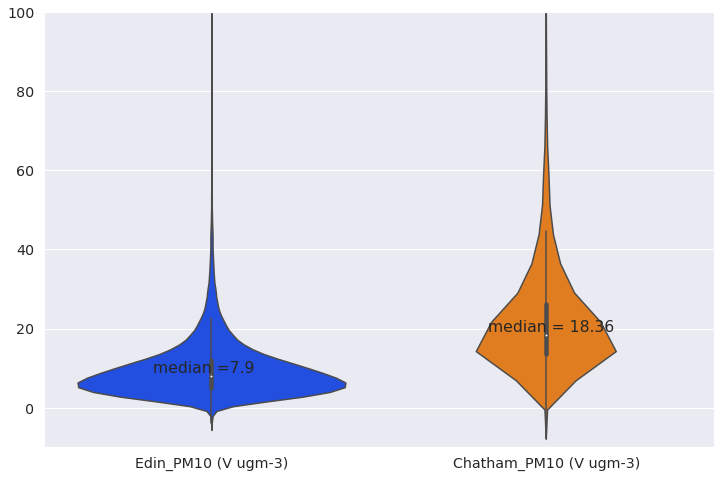

In [ ]:
do_violin_plot(PM10_data, 'Edin_PM10 (V ugm-3)', 'Chatham_PM10 (V ugm-3)', "Particle matter 10 Level (V ug/m3)")

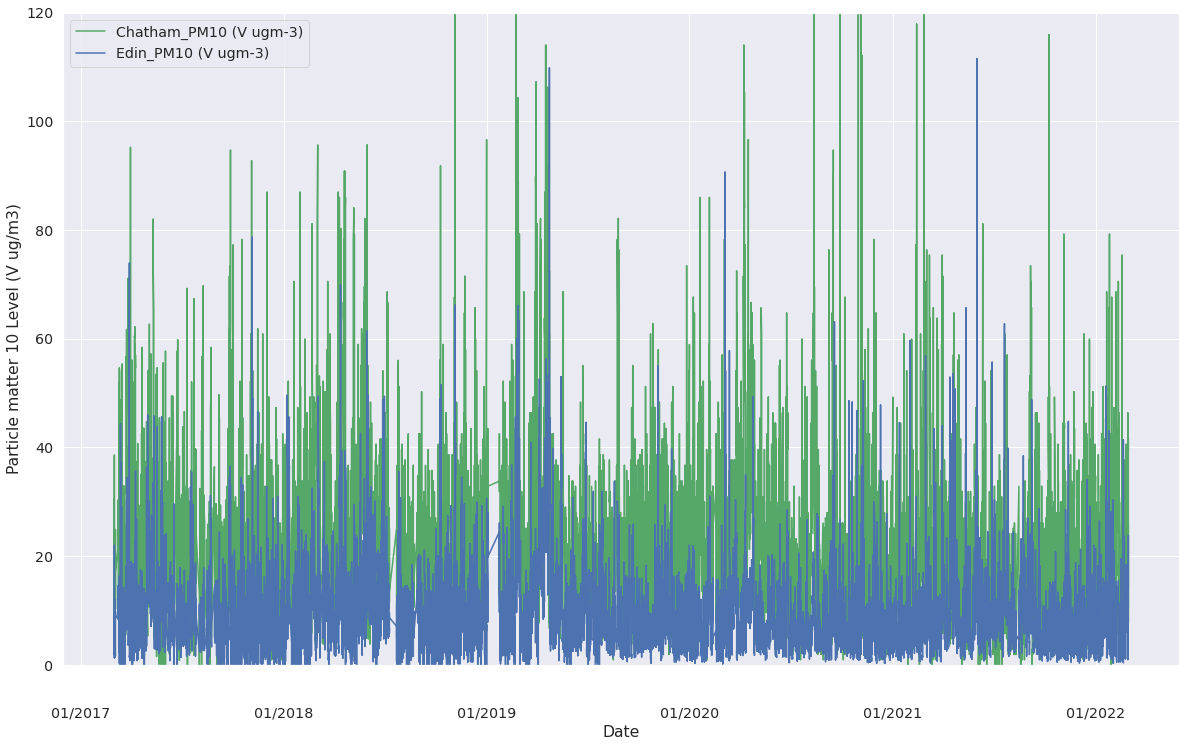

In [ ]:
do_line_plot_columns(PM10_data,"Date", 'Chatham_PM10 (V ugm-3)', 'Edin_PM10 (V ugm-3)','Date',"Particle matter 10 Level (V ug/m3)")

Let's explore the yearly and weekly averages.

In [ ]:
PM10_yearly =make_yearly_data(PM10_data)

In [ ]:
PM10_yearly_data = PM10_yearly.groupby(by = ['year', 'Day_of_the_week'])['Chatham_PM10 (V ugm-3)','Edin_PM10 (V ugm-3)'].mean().reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
PM10_yearly_ave = PM10_yearly_data.groupby(by = ['year'])['Chatham_PM10 (V ugm-3)','Edin_PM10 (V ugm-3)'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Yearly measurements:

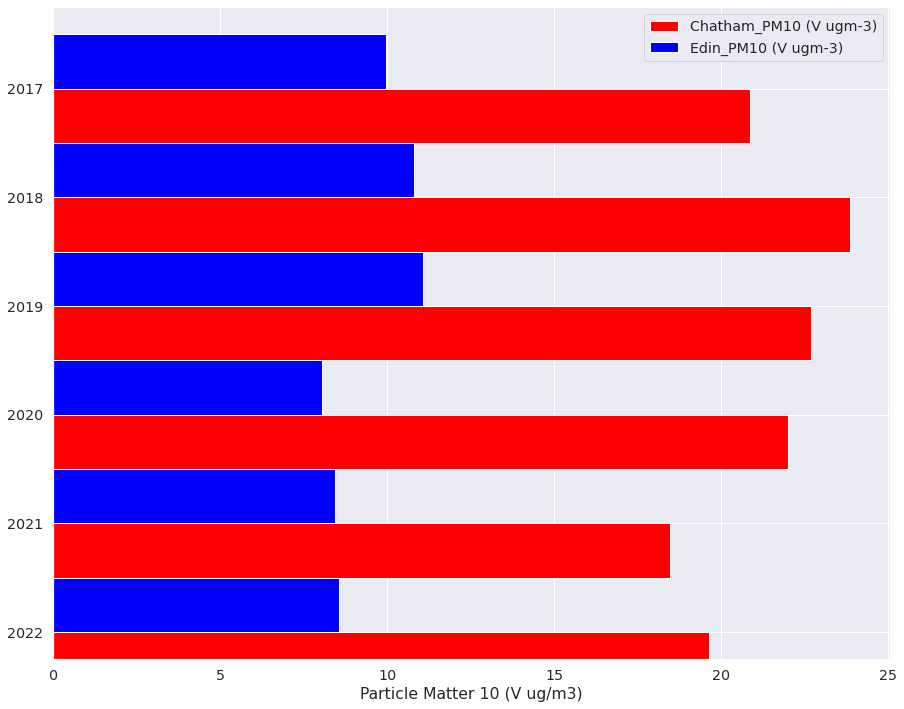

In [ ]:
x3 = PM10_yearly_ave['year']
y5 = PM10_yearly_ave['Chatham_PM10 (V ugm-3)']
y6 = PM10_yearly_ave['Edin_PM10 (V ugm-3)']

do_bar_plot1(x3,y5,y6,"Particle Matter 10 (V ug/m3)",['Chatham_PM10 (V ugm-3)','Edin_PM10 (V ugm-3)'])

In [ ]:
R_value = get_correlation(x3,y5)
print(color.BOLD+"The Pearson correlation coefficient between year and PM10 level in Chatham is:"+color.END+"{:10.2f}".format(R_value[0][1]))
print("This shows that there is a medium level correlation between year and PM10 levels in Chatham")

The Pearson correlation coefficient between year and PM10 level in Chatham is:     -0.61
This shows that there is a medium level correlation between year and PM10 levels in Chatham


Like the other pollutant, $NO_{2}$, PM10 also goes down with each year in Chatham.

In [ ]:
R_value = get_correlation(x3,y6)
print(color.BOLD+"The Pearson correlation coefficient between year and PM10 level in Edinburgh is:"+color.END+"{:10.2f}".format(R_value[0][1]))
print("This shows that there is a medium level correlation between year and PM10 levels in Edinburgh")

The Pearson correlation coefficient between year and PM10 level in Edinburgh is:     -0.70
This shows that there is a medium level correlation between year and PM10 levels in Edinburgh


PM10 goes down with each year in Edinburgh as well and the PM10 levels are much lower in Edinburgh than Chatham.

In [ ]:
PM10_weekly_ave = PM10_yearly_data.groupby(by = ['Day_of_the_week'])['Chatham_PM10 (V ugm-3)','Edin_PM10 (V ugm-3)'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Weekly measurements:

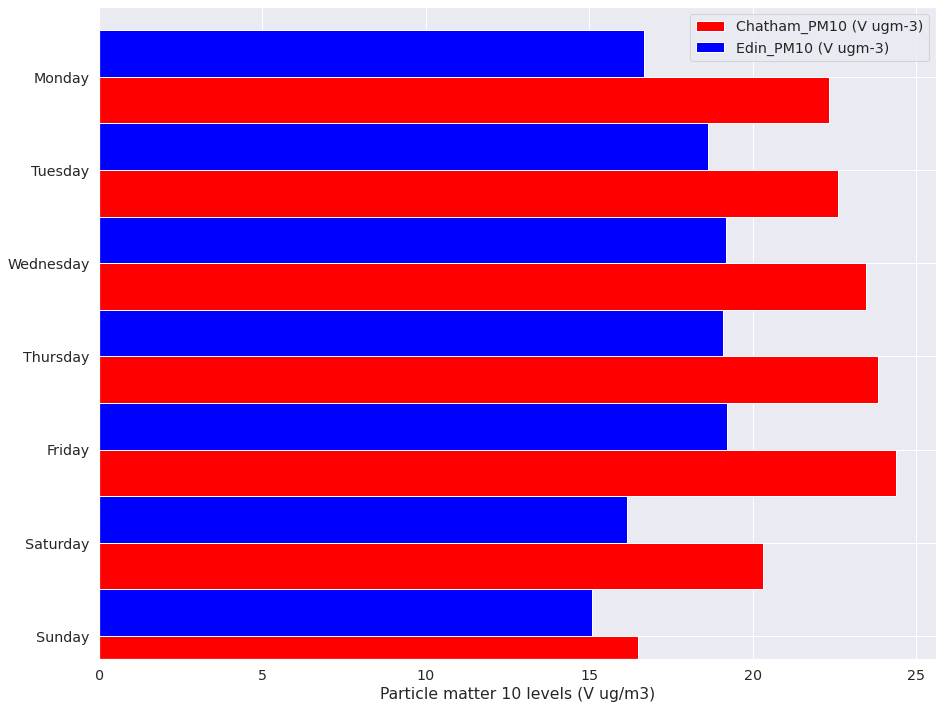

In [ ]:
y7 = weekly_ave.Chatham_NO2_Level
y8 = weekly_ave.Edin_NO2_Level

do_bar_plot1(x2,y7,y8,"Particle matter 10 levels (V ug/m3)",['Chatham_PM10 (V ugm-3)','Edin_PM10 (V ugm-3)'])

Again, the weekends show a reduction in PM10 Values. This may be because, during the weekends, most constructions and other work are stopped and resume during the weekdays.

Again, which days of the weeks show higher PM10 levels in Chatham compared to Edinburgh?

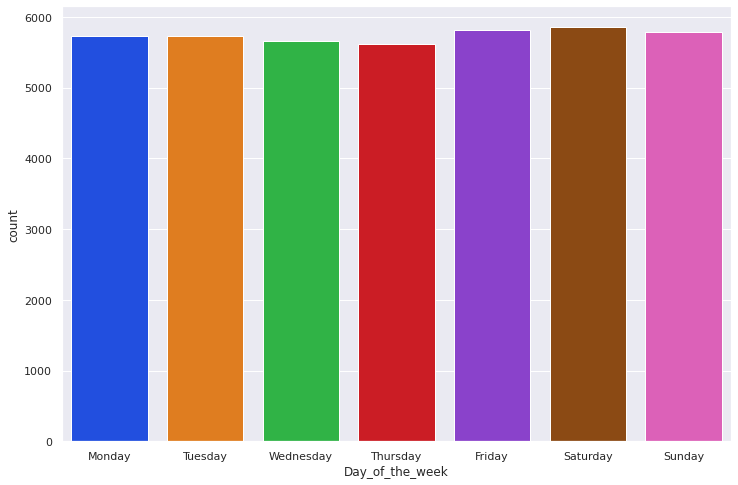

In [ ]:
PM10_data['Bool_comparison'] = PM10_data['Chatham_PM10 (V ugm-3)'].gt(PM10_data['Edin_PM10 (V ugm-3)'])
do_count_plot(PM10_data['Day_of_the_week'], PM10_data['Bool_comparison'])

Again, this graph shows a trend very similar to the $NO_{2}$ measurement. However, the number of higher level of PM10 measurements at Chatham roadside station compared to Edinburgh is significantly larger for PM10 than $NO_{2}$.

#Conclusion
We have looked at two pollutants, Nitrogen dioxide and PM10 levels, measured in two air quality measuring stations, namely, Chatham road side, Kent and St.Leonard's street, Edinburgh.

We obtained the data from Defra which is saved and uploaded to the dataset folder as csv files. We have read, cleaned, sorted and wrangled the datasets in pandas. We used both seaborn and matplotlib for visualisations and numpy to compare the pollution levels in the two stations and get Pearsons' correlations.

Both pollutants levels are higher in Chatham than in Edinburgh. Nitrogen dioxide levels have shown a significant reduction during the lockdown (2020) in both places. However, the PM10 particles are not caused only to fuel combustion and so, they do not show any significant change due to lockdown.

The data shows strong correlation between decrease in the levels of both pollutants in both stations over the years. If this trend continues, we may hope to further reduce the pollution of both kinds in both the areas of measurements in the coming years.

### Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
